In [7]:
# !pip install xgboost
# import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import load_boston
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import plotly.express as px
import seaborn as sns
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [8]:
suicide_risk = pd.read_csv("foreveralone.csv")
suicide_risk.drop("time", axis = 1, inplace = True)
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [30]:
race_freq = (suicide_risk['race'].value_counts())/suicide_risk.shape[0]
less_freq_race = race_freq[race_freq<=0.04]
suicide_risk.loc[suicide_risk['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
suicide_risk["race"].value_counts()

White non-Hispanic        336
Asian                      54
Hispanic (of any race)     32
other                      25
Black                      22
Name: race, dtype: int64

In [33]:
le = preprocessing.LabelEncoder()
updated_race = le.fit_transform(suicide_risk['race'])
updated_gender = le.fit_transform(suicide_risk["gender"])
updated_sexuallity = le.fit_transform(suicide_risk["sexuallity"])
updated_bodyweight = le.fit_transform(suicide_risk["bodyweight"])
updated_virgin = le.fit_transform(suicide_risk["virgin"])
updated_prostitution_legal = le.fit_transform(suicide_risk["prostitution_legal"])
updated_pay_for_sex = le.fit_transform(suicide_risk["pay_for_sex"])

In [11]:
dummies = pd.get_dummies(suicide_risk["attempt_suicide"])
dummies.head()

,No,Yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
suicide_risk["attempt_suicide"] = dummies["Yes"]
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",1,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",0,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,0,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,0,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,0,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


<AxesSubplot:>

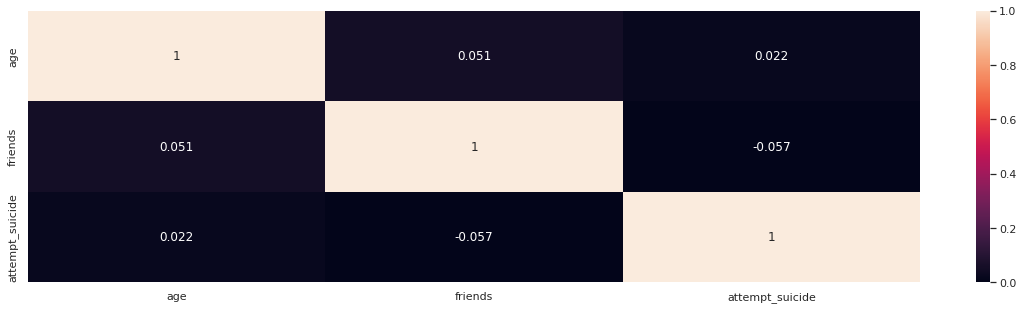

In [19]:
sns.set(rc = {'figure.figsize':(20,5)})
sns.heatmap(suicide_risk.corr(), vmin = 0, vmax = 1, annot = True)

In [21]:
suicide_risk.columns

Index(['gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'job_title', 'edu_level', 'improve_yourself_how'],
      dtype='object')

In [22]:
target = suicide_risk["attempt_suicide"]
input_columns = suicide_risk.loc[:, suicide_risk.columns != "attempt_suicide"]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((375, 17), (94, 17), (375,), (94,))

In [26]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, ...)

In [34]:
xg_reg.fit(x_train,y_train)

y_pred = xg_reg.predict(x_test)

ValueError: DataFrame.dtypes for data must be int, float, bool or category.  When
categorical type is supplied, DMatrix parameter `enable_categorical` must
be set to `True`. Invalid columns:gender, sexuallity, income, race, bodyweight, virgin, prostitution_legal, pay_for_sex, social_fear, depressed, what_help_from_others, employment, job_title, edu_level, improve_yourself_how